# Projeto de avaliação de modelos de ML
Este notebook apresenta um projeto de classificação que tem como objetivo construir e avaliar modelos de Machine Learning para prever a ocorrência de diabetes com base em um conjunto de dados de saúde. Ao longo deste notebook, exploraremos diferentes etapas do processo de construção de modelos, incluindo a preparação dos dados, treinamento de algoritmos de classificação e avaliação de seu desempenho utilizando diversas métricas.

# Preparação dos Dados

### Leitura da base de dados

Nesta etapa faremos a  leitura da base de dados de diabetes e
a divisão dos dados em variáveis explicativas e variável alvo (x e y).

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv('/content/diabetes.csv')

In [ ]:
dados.head()

,glicemia,pressao_sanguinea,dobra_cutane_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   glicemia              394 non-null    int64  
 1   pressao_sanguinea     394 non-null    int64  
 2   dobra_cutane_triceps  394 non-null    int64  
 3   insulina              394 non-null    float64
 4   imc                   394 non-null    float64
 5   diabetes              394 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 18.6 KB


In [ ]:
x = dados.drop('diabetes', axis=1)
y = dados['diabetes']

### Divisão dos dados para o treinamento do modelo

Realizaremos a divisão dos dados entre treino e teste.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x, x_teste, y, y_teste = train_test_split(x, y, test_size = 0.05, stratify=y, random_state=5)
x_treino, x_validacao, y_treino, y_validacao = train_test_split(x, y, test_size=0.20, stratify=y, random_state=5)

### Criando os modelos

Iremos criar 2 modelos utilizando os algoritmos [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) e [RandomForestClassifer](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) e avaliaremos a acurácia de treino e teste, escolhendo valores para o parâmetro `max_depth` para os modelos não se especializarem demais no padrão dos dados de treino.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [ ]:
dt_model = DecisionTreeClassifier(max_depth=3, random_state=5)
rf_model = RandomForestClassifier(max_depth=2, random_state=5)

In [ ]:
dt_model.fit(x_treino, y_treino)

DecisionTreeClassifier(max_depth=3, random_state=5)

In [ ]:
rf_model.fit(x_treino, y_treino)

RandomForestClassifier(max_depth=2, random_state=5)

In [ ]:
y_treino_dt_pred = dt_model.predict(x_treino)
y_validacao_dt_pred = dt_model.predict(x_validacao)
y_treino_rf_pred = rf_model.predict(x_treino)
y_validacao_rf_pred = rf_model.predict(x_validacao)

In [ ]:
accuracy_treino_dt = accuracy_score(y_treino, y_treino_dt_pred)
accuracy_validacao_dt = accuracy_score(y_validacao, y_validacao_dt_pred)
accuracy_treino_rf = accuracy_score(y_treino, y_treino_rf_pred)
accuracy_validacao_rf = accuracy_score(y_validacao, y_validacao_rf_pred)

print(f"Decision Tree Training Acurácia: {accuracy_treino_dt:.4f}")
print(f"Decision Tree Validation Acurácia: {accuracy_validacao_dt:.4f}")
print(f"Random Forest Training Acurácia: {accuracy_treino_rf:.4f}")
print(f"Random Forest Validation Acurácia: {accuracy_validacao_rf:.4f}")

Decision Tree Training Acurácia: 0.7592
Decision Tree Validation Acurácia: 0.7733
Random Forest Training Acurácia: 0.7258
Random Forest Validation Acurácia: 0.7067


### Avaliando os modelos

Nesta etapa iremos construir uma matriz de confusão para cada um dos modelos para avaliar o desempenho das previsões.

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

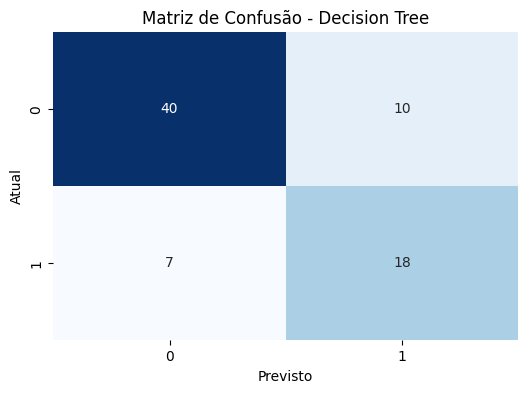

In [ ]:
cm_dt = confusion_matrix(y_validacao, y_validacao_dt_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Previsto')
plt.ylabel('Atual')
plt.title('Matriz de Confusão - Decision Tree')
plt.show()

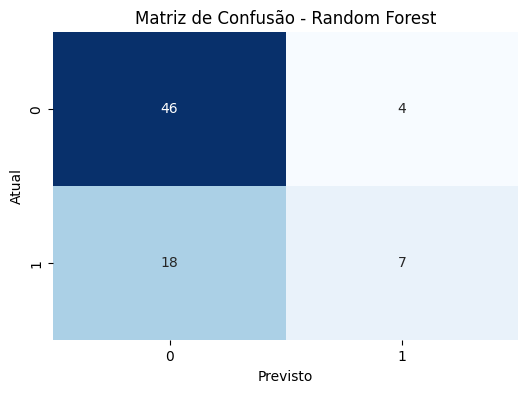

In [ ]:
cm_rf = confusion_matrix(y_validacao, y_validacao_rf_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Previsto')
plt.ylabel('Atual')
plt.title('Matriz de Confusão - Random Forest')
plt.show()

# Extraindo as métricas

### Avaliando as métricas

Iremos extrair as métricas acurácia, recall, precisão e F1-Score dos modelos de classificação gerados para avaliar o desempenho de cada uma.

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(f'Acurácia: {accuracy_score(y_validacao, y_validacao_rf_pred)}')

Acurácia: 0.7066666666666667


In [ ]:
print(f'Acurácia: {accuracy_score(y_validacao, y_validacao_dt_pred)}')

Acurácia: 0.7733333333333333


In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
print(f'Precisão RF: {precision_score(y_validacao, y_validacao_rf_pred)}')
print(f'Revocação RF: {recall_score(y_validacao, y_validacao_rf_pred)}')
print(f'Precisão: DT {precision_score(y_validacao, y_validacao_dt_pred)}')
print(f'Revocação: DT {recall_score(y_validacao, y_validacao_dt_pred)}')

Precisão RF: 0.6363636363636364
Revocação RF: 0.28
Precisão: DT 0.6428571428571429
Revocação: DT 0.72


In [ ]:
from sklearn.metrics import f1_score

In [ ]:
print(f'F1-score RF: {f1_score(y_validacao, y_validacao_rf_pred)}')
print(f'F1-score DT: {f1_score(y_validacao, y_validacao_dt_pred)}')

F1-score RF: 0.3888888888888889
F1-score DT: 0.6792452830188679


### Obtendo ROC/AUC

Vamos obter a curva ROC e a métrica AUC dos modelos de classificação gerados e iremos comparar as curvas no mesmo gráfico.


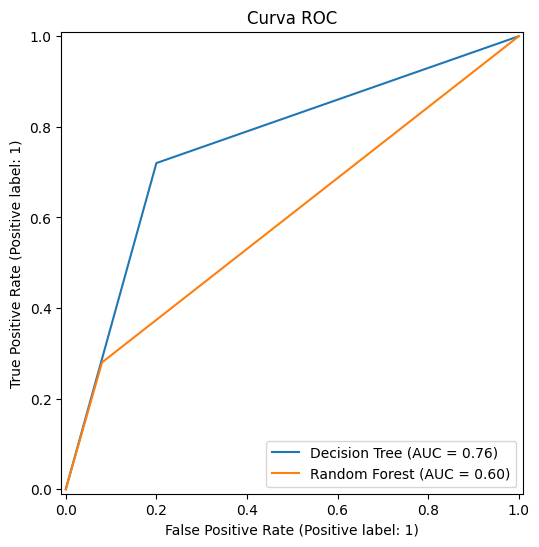

In [ ]:
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots(figsize=(8, 6))

RocCurveDisplay.from_predictions(y_validacao, y_validacao_dt_pred, ax=ax, name="Decision Tree")

RocCurveDisplay.from_predictions(y_validacao, y_validacao_rf_pred, ax=ax, name="Random Forest")

plt.title('Curva ROC')
plt.show()


Agora faremos o mesmo com a curva precisão x recall e a métrica AP dos modelos de classificação gerados, comparando as curvas no mesmo gráfico.


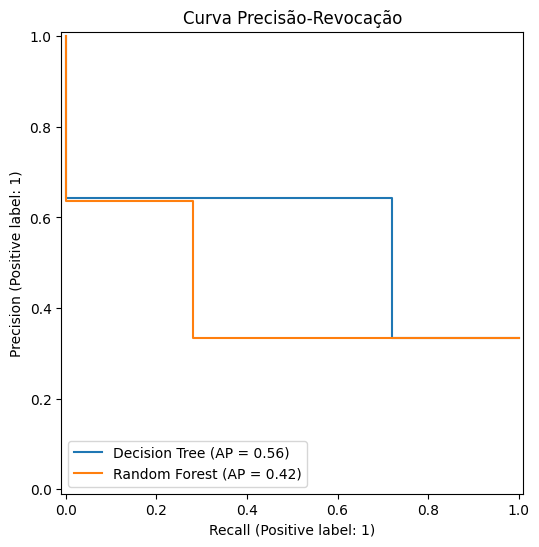

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

fig, ax = plt.subplots(figsize=(8, 6))


PrecisionRecallDisplay.from_predictions(y_validacao, y_validacao_dt_pred, ax=ax, name="Decision Tree")


PrecisionRecallDisplay.from_predictions(y_validacao, y_validacao_rf_pred, ax=ax, name="Random Forest")

plt.title('Curva Precisão-Revocação')
plt.show()

### Gerando Relatórios

Nesta etapa iremos gerar os relatórios de métricas dos modelos de classificação gerados até o momento para podermos avaliar os seus desempenhos.

In [ ]:
from sklearn.metrics import classification_report

print("Relatório de Classificação - Decision Tree:")
print(classification_report(y_validacao, y_validacao_dt_pred))

print("\nRelatório de Classificação - Random Forest:")
print(classification_report(y_validacao, y_validacao_rf_pred))

Relatório de Classificação - Decision Tree:
              precision    recall  f1-score   support

           0       0.85      0.80      0.82        50
           1       0.64      0.72      0.68        25

    accuracy                           0.77        75
   macro avg       0.75      0.76      0.75        75
weighted avg       0.78      0.77      0.78        75


Relatório de Classificação - Random Forest:
              precision    recall  f1-score   support

           0       0.72      0.92      0.81        50
           1       0.64      0.28      0.39        25

    accuracy                           0.71        75
   macro avg       0.68      0.60      0.60        75
weighted avg       0.69      0.71      0.67        75



# Validação Cruzada

### Intervalo de confiança

Criaremos uma função para calcular o intervalo de confiança dos resultados de uma validação cruzada com 2 desvios padrão. A função terá um parâmetro para receber uma lista com os desempenhos da validação cruzada e outro para apresentar o nome do modelo utilizado na validação cruzada.


In [ ]:
import numpy as np

def calcular_intervalo_confianca(scores, nome_modelo):
  """
  Calcula o intervalo de confiança (média +/- 2 desvios padrão) para uma lista de scores.

  Args:
    scores: Uma lista de scores de validação cruzada.
    nome_modelo: O nome do modelo utilizado.
  """
  media = np.mean(scores)
  desvio_padrao = np.std(scores)
  intervalo_minimo = media - 2 * desvio_padrao
  intervalo_maximo = media + 2 * desvio_padrao

  print(f'Intervalo de confiança ("{nome_modelo}"): ["{intervalo_minimo:.4f}", "{intervalo_maximo:.4f}"]')

### Método KFold

Avaliaremos o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada com o método [`KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html), usando 10 partes e embaralhando os dados antes da separação. Usaremos o método [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) que não retorna o tempo de execução, apenas as métricas.

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=10, shuffle=True, random_state=5)

dt_scores_kfold = cross_val_score(dt_model, x, y, cv=kf)

rf_scores_kfold = cross_val_score(rf_model, x, y, cv=kf)

calcular_intervalo_confianca(dt_scores_kfold, "Decision Tree (KFold)")
calcular_intervalo_confianca(rf_scores_kfold, "Random Forest (KFold)")

Intervalo de confiança ("Decision Tree (KFold)"): ["0.5293", "0.8676"]
Intervalo de confiança ("Random Forest (KFold)"): ["0.6101", "0.7903"]


### Método StratifiedKFold

Agora avaliaremos o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada (`cross_val_score`) com o método [`StratifiedKFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold), usando 10 partes e embaralhando os dados antes da separação e avaliando a métrica F1-Score.

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=5)

dt_scores_skf = cross_val_score(dt_model, x, y, cv=skf, scoring='f1')

rf_scores_skf = cross_val_score(rf_model, x, y, cv=skf, scoring='f1')

calcular_intervalo_confianca(dt_scores_skf, "Decision Tree (StratifiedKFold - F1-Score)")
calcular_intervalo_confianca(rf_scores_skf, "Random Forest (StratifiedKFold - F1-Score)")

Intervalo de confiança ("Decision Tree (StratifiedKFold - F1-Score)"): ["0.2682", "0.7354"]
Intervalo de confiança ("Random Forest (StratifiedKFold - F1-Score)"): ["0.0777", "0.5770"]


### Método LeaveOneOut

Avaliaremos o desempenho dos modelos novamente utilizando a validação cruzada (`cross_val_score`) com o método [`LeaveOneOut`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html).

O método LeaveOneOut vai gerar um modelo para cada uma das linhas da base de dados, portanto a lista de resultados terá taxa de acerto apenas de 0 ou 1 para cada modelo. Dessa forma, iremos extrair apenas a média do resultado, sem utilizar o intervalo de confiança.


In [ ]:
from sklearn.model_selection import LeaveOneOut, cross_val_score

loo = LeaveOneOut()

dt_scores_loo = cross_val_score(dt_model, x, y, cv=loo)

rf_scores_loo = cross_val_score(rf_model, x, y, cv=loo)

print(f"Decision Tree (LeaveOneOut) Precisão Média: {np.mean(dt_scores_loo):.4f}")
print(f"Random Forest (LeaveOneOut) Precisão Média: {np.mean(rf_scores_loo):.4f}")

Decision Tree (LeaveOneOut) Precisão Média: 0.7086
Random Forest (LeaveOneOut) Precisão Média: 0.6818


# Balanceamento dos dados

### Verificando a proporção

Faremos a verificação da proporção de dados da variável alvo do conjunto de dados de diabetes. Essa análise será feita com a utilização de um gráfico de contagem para entender se há um desbalanceamento de dados.

Proporção da variável alvo:
diabetes
0    0.670051
1    0.329949
Name: proportion, dtype: float64


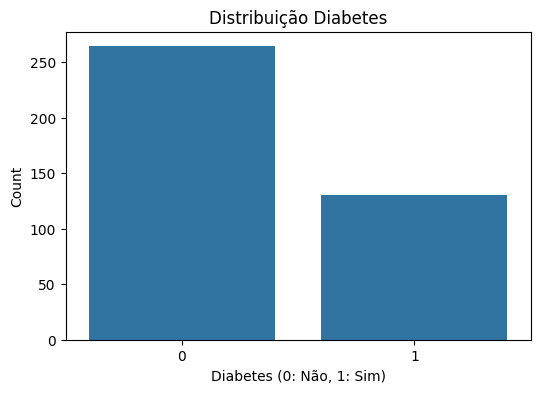

In [ ]:
print("Proporção da variável alvo:")
print(dados['diabetes'].value_counts(normalize=True))

plt.figure(figsize=(6, 4))
sns.countplot(x='diabetes', data=dados)
plt.title('Distribuição Diabetes')
plt.xlabel('Diabetes (0: Não, 1: Sim)')
plt.ylabel('Count')
plt.show()

### Pipeline - oversampling

Utilizaremos um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o oversampling com [`SMOTE`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html), obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=5)

pipeline_dt_smote = Pipeline([
    ('smote', SMOTE(random_state=5)),
    ('dt', DecisionTreeClassifier(max_depth=3, random_state=5))
])


pipeline_rf_smote = Pipeline([
    ('smote', SMOTE(random_state=5)),
    ('rf', RandomForestClassifier(max_depth=2, random_state=5))
])

dt_smote_scores = cross_val_score(pipeline_dt_smote, x, y, cv=skf, scoring='f1')

rf_smote_scores = cross_val_score(pipeline_rf_smote, x, y, cv=skf, scoring='f1')

print(f"Decision Tree com SMOTE (StratifiedKFold - F1-Score) Média: {np.mean(dt_smote_scores):.4f}")
print(f"Random Forest com SMOTE (StratifiedKFold - F1-Score) Média: {np.mean(rf_smote_scores):.4f}")

Decision Tree com SMOTE (StratifiedKFold - F1-Score) Média: 0.5738
Random Forest com SMOTE (StratifiedKFold - F1-Score) Média: 0.6125


### Pipeline - undersampling

 Agora utilizaremos um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o undersampling com [`Nearmiss`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) na sua versão 3, obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

In [ ]:
from imblearn.under_sampling import NearMiss

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=5)

pipeline_dt_nearmiss = Pipeline([
    ('nearmiss', NearMiss(version=3)),
    ('dt', DecisionTreeClassifier(max_depth=3, random_state=5))
])

pipeline_rf_nearmiss = Pipeline([
    ('nearmiss', NearMiss(version=3)),
    ('rf', RandomForestClassifier(max_depth=2, random_state=5))
])

dt_nearmiss_scores = cross_val_score(pipeline_dt_nearmiss, x, y, cv=skf, scoring='f1')

rf_nearmiss_scores = cross_val_score(pipeline_rf_nearmiss, x, y, cv=skf, scoring='f1')

print(f"Decision Tree com NearMiss (version 3) (StratifiedKFold - F1-Score) Média: {np.mean(dt_nearmiss_scores):.4f}")
print(f"Random Forest com NearMiss (version 3) (StratifiedKFold - F1-Score) Média: {np.mean(rf_nearmiss_scores):.4f}")

Decision Tree com NearMiss (version 3) (StratifiedKFold - F1-Score) Média: 0.5450
Random Forest com NearMiss (version 3) (StratifiedKFold - F1-Score) Média: 0.6175


### Escolhendo o modelo

Iremos escolher o modelo que obteve o melhor desempenho ao comparar as estratégias de oversampling e undersampling e realizaremos o teste do modelo nos dados de teste que foram separados no início.

Avaliação final do modelo em dados de teste:
              precision    recall  f1-score   support

           0       0.80      0.62      0.70        13
           1       0.50      0.71      0.59         7

    accuracy                           0.65        20
   macro avg       0.65      0.66      0.64        20
weighted avg       0.70      0.65      0.66        20



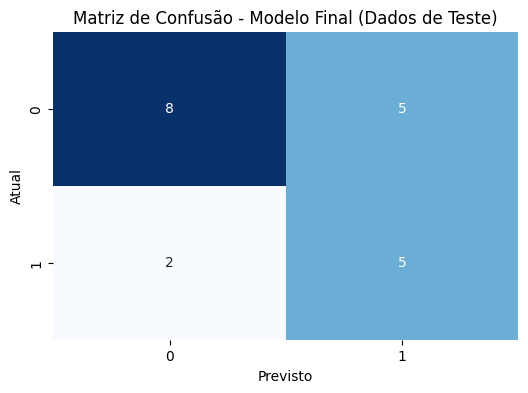

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

final_model_pipeline = Pipeline([
    ('nearmiss', NearMiss(version=3)),
    ('rf', RandomForestClassifier(max_depth=2, random_state=5))
])

final_model_pipeline.fit(x, y)

y_teste_pred = final_model_pipeline.predict(x_teste)

print("Avaliação final do modelo em dados de teste:")
print(classification_report(y_teste, y_teste_pred))

cm_test = confusion_matrix(y_teste, y_teste_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Previsto')
plt.ylabel('Atual')
plt.title('Matriz de Confusão - Modelo Final (Dados de Teste)')
plt.show()

## Relatório do Projeto de Classificação de Diabetes

Este projeto teve como objetivo desenvolver e avaliar modelos de classificação para prever diabetes com base em um conjunto de dados fornecido. O projeto seguiu diversas etapas, desde a preparação inicial dos dados até a avaliação final do modelo em dados de teste não vistos.

**Principais Pontos Abordados:**

1.  **Carregamento e Exploração dos Dados:** Iniciamos carregando a base de dados de diabetes e realizando uma exploração inicial para entender sua estrutura e conteúdo.
2.  **Divisão dos Dados:** Os dados foram divididos em conjuntos de treino, validação e teste, com uma proporção de 5% para teste e o restante (95%) dividido em 80% para treino e 20% para validação. A estratificação foi utilizada para garantir que a proporção da variável alvo fosse mantida em cada conjunto.
3.  **Criação e Avaliação de Modelos Base:** Foram criados dois modelos base utilizando os algoritmos Decision Tree Classifier e Random Forest Classifier. Definimos valores específicos para o parâmetro `max_depth` para evitar overfitting. A acurácia de treino e validação foi calculada para ambos os modelos.
4.  **Métricas de Avaliação:** Diversas métricas de avaliação foram utilizadas para entender o desempenho dos modelos, incluindo:
    *   Matriz de Confusão: Visualização dos resultados de classificação, mostrando verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos.
    *   Acurácia, Precisão, Recall e F1-Score: Cálculo dessas métricas para quantificar o desempenho dos modelos, especialmente relevante em casos de desbalanceamento de classes.
    *   Curva ROC e AUC: Avaliação da capacidade do modelo de distinguir entre as classes positiva e negativa.
    *   Curva Precisão-Recall e AP: Avaliação do trade-off entre precisão e recall, útil para conjuntos de dados desbalanceados.
    *   Relatório de Classificação: Um resumo completo das métricas precision, recall e f1-score por classe.
5.  **Validação Cruzada:** A validação cruzada foi aplicada para obter uma estimativa mais robusta do desempenho dos modelos, utilizando os métodos KFold, StratifiedKFold e LeaveOneOut. A função `calcular_intervalo_confianca` foi criada para avaliar a variação dos resultados.
6.  **Tratamento de Desbalanceamento de Classes:** Foi identificada a proporção dos dados da variável alvo, que apresentou um desbalanceamento. Para lidar com isso, foram exploradas estratégias de balanceamento de dados usando pipelines:
    *   Oversampling com SMOTE: Aumentando o número de instâncias da classe minoritária.
    *   Undersampling com NearMiss (versão 3): Reduzindo o número de instâncias da classe majoritária.
    O desempenho de modelos com essas estratégias foi avaliado usando a média do F1-Score com StratifiedKFold.
7.  **Avaliação Final no Conjunto de Teste:** O modelo que apresentou o melhor desempenho durante as etapas de validação (considerando as estratégias de balanceamento) foi selecionado. Este modelo foi treinado utilizando todo o conjunto de dados de treino (original e validação) com a melhor estratégia de balanceamento aplicada. A avaliação final foi realizada no conjunto de dados de teste, que nunca foi utilizado durante o treinamento ou validação. Um relatório de classificação e uma matriz de confusão foram gerados para a avaliação final.

**Conclusões e Insights:**

*   A análise inicial da variável alvo confirmou a presença de desbalanceamento de classes, o que justifica a importância de utilizar métricas de avaliação robustas e estratégias de balanceamento.
*   A validação cruzada forneceu uma avaliação mais confiável do desempenho dos modelos em comparação com a simples divisão treino/validação. O intervalo de confiança ajudou a entender a variabilidade dos resultados.
*   As estratégias de oversampling (SMOTE) e undersampling (NearMiss) tiveram impactos diferentes no desempenho dos modelos, especialmente no F1-Score, que é uma métrica importante em casos de desbalanceamento. A comparação dos resultados das validações cruzadas com essas estratégias permitiu a escolha da melhor abordagem.
*   A avaliação final no conjunto de teste forneceu uma estimativa realista do desempenho do modelo em dados não vistos. As métricas do relatório de classificação e a matriz de confusão na base de teste são cruciais para entender como o modelo se comportaria em um cenário real.
*   Observar as métricas de Precisão e Recall é fundamental em problemas de classificação de doenças como diabetes, onde o custo de um falso negativo (não identificar um caso positivo) pode ser alto. A escolha do modelo final deve levar em conta o trade-off entre essas métricas, dependendo do objetivo principal da aplicação.

Este projeto demonstrou um fluxo de trabalho completo para a construção e avaliação de modelos de classificação, incluindo a importância da exploração de dados, divisão estratégica, uso de diversas métricas de avaliação, validação cruzada e técnicas para lidar com desbalanceamento de classes. A avaliação final em um conjunto de teste não visto é essencial para garantir a generalização do modelo.